In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_excel("sales.xlsx")
df.head()

,Order_ID,Customer_Name,Email,Purchase_Date,Product_Category,Product_Name,Amount_Spent,Discount_Applied,Payment_Method,Delivery_Status,Customer_Location,Review_Rating,Return_Status,Shipping_Cost,Delivery_Time_Days,Customer_Age
0,758634,Amit,rahul@domain.com,2025-03-07,NaN,NaN,400.0,20.0,Cash,NaN,Chennai,3.0,Not Returned,200.0,5.0,35.0
1,617313,Suman,suman@invalid,2025-02-28,NaN,Makeup Kit,-150.0,NaN,Debit Card,NaN,Delhi,3.0,NaN,NaN,10.0,45.0
2,493325,Ankit,rahul@domain.com,2025-03-07,Fashion,Fiction Book,400.0,25.0,NaN,Returned,Bangalore,3.0,Not Returned,150.0,10.0,NaN
3,941066,Ankit,neha@example,2025-03-10,Sports,NaN,500.0,20.0,Credit Card,Returned,NaN,3.0,NaN,200.0,2.0,28.0
4,396423,Priya,amit@site.com,2025-02-28,Beauty,Fiction Book,0.0,25.0,NaN,NaN,Delhi,5.0,NaN,100.0,1.0,35.0


In [4]:
df.describe()

,Order_ID,Amount_Spent,Discount_Applied,Review_Rating,Shipping_Cost,Delivery_Time_Days,Customer_Age
count,800.000000,710.000000,711.000000,703.000000,624.000000,685.000000,720.000000
mean,538226.402500,496.338028,22.320675,2.900427,128.365385,4.534307,34.234722
std,257055.024043,484.350260,11.535059,2.199142,57.053560,3.078040,8.735913
min,100882.000000,-150.000000,5.000000,-1.000000,50.000000,1.000000,22.000000
25%,320391.750000,0.000000,10.000000,1.000000,100.000000,2.000000,28.000000
50%,535275.500000,500.000000,20.000000,3.000000,150.000000,3.000000,33.000000
75%,758755.750000,900.000000,30.000000,5.000000,200.000000,7.000000,40.000000
max,997715.000000,1300.000000,40.000000,6.000000,200.000000,10.000000,50.000000


# remove duplicates


In [6]:
df.duplicated().sum()

50

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

# Handle null values

In [10]:
df.isnull().sum()

Order_ID                0
Customer_Name          64
Email                 102
Purchase_Date         111
Product_Category      116
Product_Name           97
Amount_Spent           85
Discount_Applied       83
Payment_Method        133
Delivery_Status       157
Customer_Location     108
Review_Rating          90
Return_Status         243
Shipping_Cost         164
Delivery_Time_Days    109
Customer_Age           76
dtype: int64

In [11]:
# delete columns if null values more than 40%
df.columns[df.isnull().sum()/df.shape[0]>0.40]

Index([], dtype='object')

no columns have more than 40% null values

In [13]:
df.columns[df.isnull().sum()/df.shape[0]>0]

Index(['Customer_Name', 'Email', 'Purchase_Date', 'Product_Category',
       'Product_Name', 'Amount_Spent', 'Discount_Applied', 'Payment_Method',
       'Delivery_Status', 'Customer_Location', 'Review_Rating',
       'Return_Status', 'Shipping_Cost', 'Delivery_Time_Days', 'Customer_Age'],
      dtype='object')

In [14]:
df=df.fillna({
    'Customer_Name':'Unknown',
    'Email':'Not_available',
    'Purchase_Date':df['Purchase_Date'].mode()[0],
    'Product_Category':df['Product_Category'].mode()[0],
    'Product_Name':df['Product_Name'].mode()[0],
    'Amount_Spent':df['Amount_Spent'].median(),
    'Discount_Applied':0,
    'Payment_Method':df['Payment_Method'].mode()[0],
    'Delivery_Status':'Pending',
    'Customer_Location':'Unknown',
    'Review_Rating':df['Review_Rating'].median(),
    'Return_Status':df['Return_Status'].mode()[0],
    'Shipping_Cost':df['Shipping_Cost'].median(),
    'Delivery_Time_Days':df['Delivery_Time_Days'].median(),
    'Customer_Age':df['Delivery_Time_Days'].median()
})

In [15]:
df.isna().sum()

Order_ID              0
Customer_Name         0
Email                 0
Purchase_Date         0
Product_Category      0
Product_Name          0
Amount_Spent          0
Discount_Applied      0
Payment_Method        0
Delivery_Status       0
Customer_Location     0
Review_Rating         0
Return_Status         0
Shipping_Cost         0
Delivery_Time_Days    0
Customer_Age          0
dtype: int64

# Correcting Incorrect Data

### Negative Amount Spent

In [18]:
df['Amount_Spent']=df['Amount_Spent'].abs()

### Invalid Product Names and Categories

In [20]:
df['Product_Name'].unique()

array(['Laptop', 'Makeup Kit', 'Fiction Book', 'Cricket Bat', 'Shoes',
       'Microwave', 'Headphones'], dtype=object)

In [21]:
df['Product_Category'].unique()

array(['Fashion', 'Sports', 'Beauty', 'Electronics', 'Books',
       'Home & Kitchen'], dtype=object)

In [22]:
# Mapping of Product_Name to Correct Product_Category
product_category_map = {
    'Laptop': 'Electronics',
    'Makeup Kit': 'Beauty',
    'Fiction Book': 'Books',
    'Cricket Bat': 'Sports',
    'Shoes': 'Fashion',
    'Microwave': 'Home & Kitchen',
    'Headphones': 'Electronics'
}
# Correct the Product_Category based on Product_Name
df['Product_Category'] = df['Product_Name'].map(product_category_map)

In [23]:
df.head(5)

,Order_ID,Customer_Name,Email,Purchase_Date,Product_Category,Product_Name,Amount_Spent,Discount_Applied,Payment_Method,Delivery_Status,Customer_Location,Review_Rating,Return_Status,Shipping_Cost,Delivery_Time_Days,Customer_Age
0,758634,Amit,rahul@domain.com,2025-03-07,Electronics,Laptop,400.0,20.0,Cash,Pending,Chennai,3.0,Not Returned,200.0,5.0,35.0
1,617313,Suman,suman@invalid,2025-02-28,Beauty,Makeup Kit,150.0,0.0,Debit Card,Pending,Delhi,3.0,Returned,150.0,10.0,45.0
2,493325,Ankit,rahul@domain.com,2025-03-07,Books,Fiction Book,400.0,25.0,Net Banking,Returned,Bangalore,3.0,Not Returned,150.0,10.0,3.0
3,941066,Ankit,neha@example,2025-03-10,Electronics,Laptop,500.0,20.0,Credit Card,Returned,Unknown,3.0,Returned,200.0,2.0,28.0
4,396423,Priya,amit@site.com,2025-02-28,Books,Fiction Book,0.0,25.0,Net Banking,Pending,Delhi,5.0,Returned,100.0,1.0,35.0


### Invalid Ratings

In [25]:
# Replace ratings less than 1 or greater than 5 with 3.0
df.loc[(df['Review_Rating'] < 1.0) | (df['Review_Rating'] > 5.0), 'Review_Rating'] = 3.0


# Analysis

### Which product category has the highest sales?

In [28]:
category_counts = df['Product_Category'].value_counts()
category_counts

Product_Category
Electronics       283
Beauty             98
Sports             98
Home & Kitchen     94
Books              89
Fashion            88
Name: count, dtype: int64

### What is the average spending in each category?

In [30]:
average_spending = df.groupby('Product_Category')['Amount_Spent'].mean().sort_values(ascending=False)
average_spending

Product_Category
Fashion           626.704545
Electronics       556.625442
Beauty            535.969388
Sports            525.000000
Books             500.561798
Home & Kitchen    498.138298
Name: Amount_Spent, dtype: float64

### rating distribution

In [32]:
rating_distribution=df['Review_Rating'].value_counts()
rating_distribution

Review_Rating
3.0    361
5.0    104
4.0    100
2.0     96
1.0     89
Name: count, dtype: int64

# Visualisation

C:\Users\user\AppData\Local\Temp\ipykernel_16832\1129792070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Amount_Spent', data=df, palette='coolwarm')


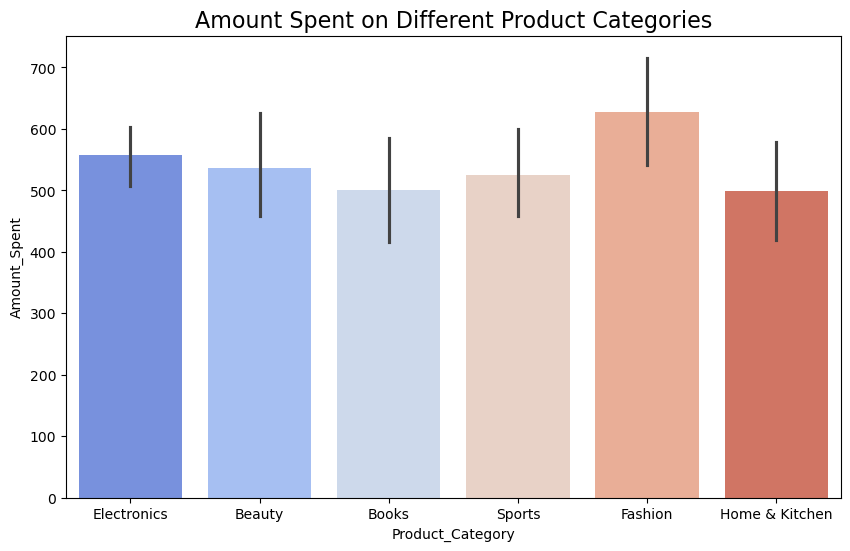

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Amount_Spent', data=df, palette='coolwarm')
plt.title('Amount Spent on Different Product Categories', fontsize=16)
plt.show()


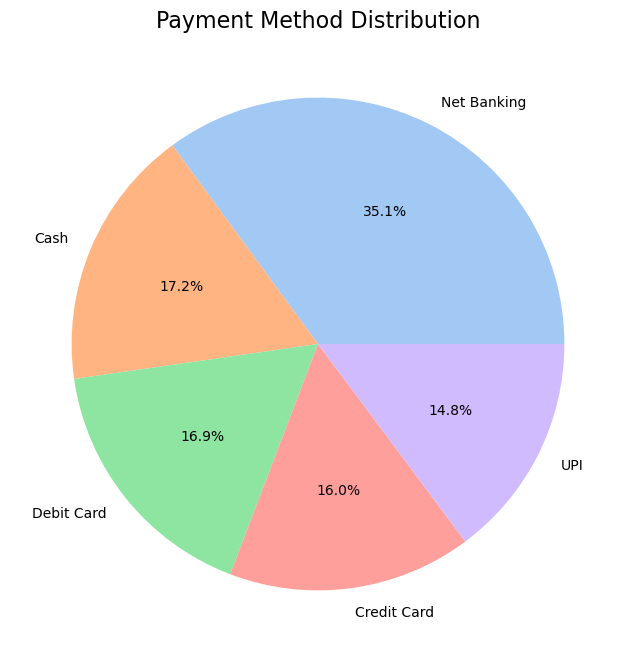

In [57]:
payment_counts = df['Payment_Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution', fontsize=16)
plt.show()


## Average Spending Analysis:

### Observation:

The highest spending is in Fashion (₹626.70) and Electronics (₹556.62).

Spending is lower in Books (₹500.56) and Home & Kitchen (₹498.13).

# Recommendation:

Boost High-Spending Categories: Run more promotions in Fashion and Electronics, as customers are already spending more in these categories.

Increase Sales in Low-Spending Categories: Offer discounts or highlight customer reviews to increase sales in Books and Home & Kitchen.

Personalized Offers: Provide exclusive deals or rewards to high-spending customers to encourage repeat purchases.

